In [73]:
import pandas as pd
import numpy as np
import requests
import time
import csv
import json
from pprint import pprint

%matplotlib inline
import matplotlib.pyplot as plt

# Import API key
from api_keys import api_key

df_2015 = pd.read_csv("2015_Top30zipcodes.csv")
df_2015 = df_2015[['Zip Code','Mean', 'Median']]

df_2016 = pd.read_csv("2016_Top30zipcodes.csv")
df_2016 = df_2016[['Zip Code','Mean', 'Median']]

df_2017 = pd.read_csv("2017_Top30codes")
df_2017 = df_2017[['Zip Code','Mean', 'Median']]

df_2018 = pd.read_csv("2018_Top30zipcodes_edited.csv")
df_2018 = df_2018[['Zip Code','Mean', 'Median']]


base_file = pd.read_csv("consolidated3.csv")
base_file = base_file.set_index('Zip Codes')
base_file = base_file.drop(['Count'],axis=1)
precinct_list = list(base_file['Precinct'])


,Borough,Neighborhood,Precinct
Zip Codes,,,
11206,Brooklyn,Bushwick and Williamsburg,90
11221,Brooklyn,Bushwick and Williamsburg,83
11237,Brooklyn,Bushwick and Williamsburg,90
11216,Brooklyn,Central Brooklyn,79
11233,Brooklyn,Central Brooklyn,81
11238,Brooklyn,Central Brooklyn,77
10027,Manhattan,Central Harlem,28
10011,Manhattan,Chelsea and Clinton,10
10019,Manhattan,Chelsea and Clinton,18


In [2]:
df_1516 = pd.merge(df_2015, df_2016, on="Zip Code", how="outer", suffixes=("_2015", "_2016"))
df_151617 = pd.merge(df_1516, df_2017, on="Zip Code", how="outer")
df_151617 = df_151617.rename(columns={'Mean':'Mean_2017','Median':'Median_2017'})

df_all = pd.merge(df_151617, df_2018, on="Zip Code", how="outer")
df_all = df_all.rename(columns={'Mean':'Mean_2018','Median':'Median_2018'})
df_all = df_all.rename(columns={'Zip Code':'Zip Codes'})
df_all = df_all.set_index('Zip Codes')
df_all = df_all.dropna()

In [3]:
df_consol = pd.merge(df_all, base_file, on="Zip Codes", how="outer")
df_consol['Precinct'] = df_consol['Precinct'].map('{:,.0f}'.format)
neighborhood_gb = df_consol.groupby(['Neighborhood','Zip Codes','Precinct']).mean()
neighborhood_df = pd.DataFrame(neighborhood_gb)
neighborhood_df = neighborhood_df.dropna()

In [4]:
neighborhood_gb = df_consol.groupby(['Precinct','Neighborhood','Zip Codes',]).mean()
neighborhood_df = pd.DataFrame(neighborhood_gb)
neighborhood_df = neighborhood_df.dropna()
neighborhood_df = neighborhood_df.sort_index(axis=0, level='Neighborhood', ascending=True)


In [10]:
prec_zip_gb = df_consol.groupby(['Precinct','Zip Codes']).mean()
prec_zip_df = pd.DataFrame(prec_zip_gb)
prec_zip_df = prec_zip_df.dropna()
prec_zip_df

Mean_2015  Median_2015   Mean_2016  Median_2016  \
Precinct Zip Codes                                                     
1        10012      255.219760        200.0  230.587597        190.0   
10       10011      242.854346        200.0  225.796276        199.0   
17       10016      237.572914        185.0  214.245595        175.0   
18       10019      229.525049        189.0  215.508512        175.0   
         10036      218.437125        175.0  212.077208        165.0   
20       10023      234.262821        190.0  223.957771        180.0   
23       10029      126.461440        100.0  127.426550        100.0   
24       10025      183.937929        145.0  158.431274        119.0   
28       10027      128.709048        110.0  121.078350        100.0   
30       10031      104.395633         80.0   99.883374         75.0   
6        10014      252.500823        210.0  239.303179        200.0   
7        10002      182.400477        150.0  168.815366        135.0   
70       11226       92.680582         75.0   84.754190         70.0   
77       11238      144.082211        120.0  138.259867        106.0   
78       11215      162.932613        139.0  150.024911        130.0   
79       11205      165.375414        115.0  154.145494        100.0   
         11216      111.900207         90.0  110.022522         85.0   
83       11221       95.713076         75.0   89.587325         70.0   
84       11217      165.974973        140.0  164.352042        130.0   
9        10003      220.328891        180.0  218.895993        169.0   
         10009      177.778549        150.0  165.071030        135.0   
90       11206      102.391970         80.0   94.994238         75.0   
         11237       91.916442         75.0   86.114981         69.0   
94       11211      150.991682        129.0  143.768193        119.0   
         11222      140.432536        120.0  128.623164        109.0   
nan      11249      176.330328        140.0  172.929537        130.0   

                     Mean_2017  Median_2017   Mean_2018  Median_2018  
Precinct Zip Codes                                                    
1        10012      224.176746        185.0  226.860020        185.0  
10       10011      225.691729        195.0  235.382632        190.0  
17       10016      215.009782        170.0  219.999161        175.0  
18       10019      215.059272        170.0  228.574660        180.0  
         10036      213.932102        168.0  215.999462        170.0  
20       10023      219.792201        182.0  219.262169        180.0  
23       10029      129.885366         98.0  140.572068         95.0  
24       10025      166.183255        110.0  166.790625        110.0  
28       10027      135.229297        100.0  135.707510        100.0  
30       10031       95.558082         75.0   98.003266         75.0  
6        10014      244.652423        200.0  256.992884        200.0  
7        10002      174.141667        129.0  171.128160        130.0  
70       11226       85.103783         69.0   85.033461         69.0  
77       11238      135.210127        100.0  137.844509        105.0  
78       11215      144.884473        129.0  147.097090        129.0  
79       11205      140.440341         99.0  140.647674         99.0  
         11216      107.358035         85.0  110.636435         85.0  
83       11221       88.334267         69.0   87.629931         68.0  
84       11217      163.994170        130.0  162.188512        130.0  
9        10003      220.491229        160.0  223.038827        169.0  
         10009      166.544186        135.0  170.691880        140.0  
90       11206       94.821426         75.0   96.825835         75.0  
         11237       80.728763         65.0   79.219594         65.0  
94       11211      145.759296        113.0  146.840053        110.0  
         11222      124.135188        100.0  135.671584        109.5  
nan      11249      170.654236        135.0  168.045567        135.0

In [106]:
precincts = [83, 77, 28, 10, 23, 70, 17, 94, 30, 79]

new_df = pd.DataFrame()
for prc in precincts:
    new_df = new_df.append(prec_zip_df.loc[f"{prc}"])

revised_base = base_file.reset_index()
revised_base = revised_base.set_index(['Precinct'])
revised_base1 = revised_base[~revised_base.index.duplicated(keep='last')]
revised_base1
        
neighborhood_list = []
for prc in precincts:
    neighborhood_list.append(revised_base1.loc[prc,'Neighborhood'])
    
neighborhood_list

['Bushwick and Williamsburg',
 'Central Brooklyn',
 'Central Harlem',
 'Chelsea and Clinton',
 'East Harlem',
 'Flatbush',
 'Gramercy Park and Murray Hill',
 'Greenpoint',
 'Inwood and Washington Heights',
 'Northwest Brooklyn']

In [107]:
drop_list = [11222, 11216]

for zipcode in drop_list:
    new_df = new_df.drop([zipcode])
new_df



,Mean_2015,Median_2015,Mean_2016,Median_2016,Mean_2017,Median_2017,Mean_2018,Median_2018
Zip Codes,,,,,,,,
11221,95.713076,75.0,89.587325,70.0,88.334267,69.0,87.629931,68.0
11238,144.082211,120.0,138.259867,106.0,135.210127,100.0,137.844509,105.0
10027,128.709048,110.0,121.078350,100.0,135.229297,100.0,135.707510,100.0
10011,242.854346,200.0,225.796276,199.0,225.691729,195.0,235.382632,190.0
10029,126.461440,100.0,127.426550,100.0,129.885366,98.0,140.572068,95.0
11226,92.680582,75.0,84.754190,70.0,85.103783,69.0,85.033461,69.0
10016,237.572914,185.0,214.245595,175.0,215.009782,170.0,219.999161,175.0
11211,150.991682,129.0,143.768193,119.0,145.759296,113.0,146.840053,110.0
10031,104.395633,80.0,99.883374,75.0,95.558082,75.0,98.003266,75.0


In [13]:
reset_df = new_df.reset_index()
reset_df = reset_df.set_index([precincts])
precinctslist = [str(x) for x in precincts]
reset_df['Precincts'] = precinctslist
reset_df['Zip Codes'] = reset_df['Zip Codes'].astype(str)
reset_df["Precinct-Zip"] = reset_df['Precincts'] +'-'+ reset_df["Zip Codes"] 
reset_df

,Zip Codes,Mean_2015,Median_2015,Mean_2016,Median_2016,Mean_2017,Median_2017,Mean_2018,Median_2018,Precincts,Precinct-Zip
83,11221,95.713076,75.0,89.587325,70.0,88.334267,69.0,87.629931,68.0,83,83-11221
77,11238,144.082211,120.0,138.259867,106.0,135.210127,100.0,137.844509,105.0,77,77-11238
28,10027,128.709048,110.0,121.078350,100.0,135.229297,100.0,135.707510,100.0,28,28-10027
10,10011,242.854346,200.0,225.796276,199.0,225.691729,195.0,235.382632,190.0,10,10-10011
23,10029,126.461440,100.0,127.426550,100.0,129.885366,98.0,140.572068,95.0,23,23-10029
70,11226,92.680582,75.0,84.754190,70.0,85.103783,69.0,85.033461,69.0,70,70-11226
17,10016,237.572914,185.0,214.245595,175.0,215.009782,170.0,219.999161,175.0,17,17-10016
94,11211,150.991682,129.0,143.768193,119.0,145.759296,113.0,146.840053,110.0,94,94-11211
30,10031,104.395633,80.0,99.883374,75.0,95.558082,75.0,98.003266,75.0,30,30-10031
79,11205,165.375414,115.0,154.145494,100.0,140.440341,99.0,140.647674,99.0,79,79-11205


In [14]:
zipcodes = reset_df["Zip Codes"].tolist()
zipcodelist = [str(x) for x in zipcodes]
zipcodelist

['11221',
 '11238',
 '10027',
 '10011',
 '10029',
 '11226',
 '10016',
 '11211',
 '10031',
 '11205']

In [16]:
crime2015_df = pd.read_csv("2015_report_count_precinct.csv")
crime2015_df = crime2015_df.reset_index()
crime2015_df = crime2015_df.drop(['index','Year'],axis=1)

crime2016_df = pd.read_csv("2016_report_count_precinct.csv")
crime2016_df = crime2016_df.reset_index()
crime2016_df = crime2016_df.drop(['index','Year'],axis=1)

crime1516_df = pd.merge(crime2015_df, crime2016_df, on="Precinct", how="outer", suffixes=("_2015", "_2016"))

crime2017_df = pd.read_csv("2017_report_count_precinct.csv")
crime2017_df = crime2017_df.reset_index()
crime2017_df = crime2017_df.drop(['index','Year'],axis=1)

crime151617_df = pd.merge(crime1516_df, crime2017_df, on="Precinct", how="outer")
crime151617_df = crime151617_df.rename(columns={'Report Count':'Report Count_2017'})
crime151617_df['Precinct'] = crime151617_df.Precinct.astype(str)

crime151617_df["Zip Codes"] = zipcodelist
crime151617_df

crime151617_df["Precinct-Zip"] = crime151617_df['Precinct'] +'-'+ crime151617_df["Zip Codes"] 
crime151617_df['Neighborhood'] = 

,Precinct,Report Count_2015,Report Count_2016,Report Count_2017,Zip Codes,Precinct-Zip
0,83,6236,6442,6538,11221,83-11221
1,77,6513,6310,6157,11238,77-11238
2,28,4956,5674,5710,10027,28-10027
3,10,3786,3907,3670,10011,10-10011
4,23,6403,6469,6207,10029,23-10029
5,70,7615,7356,7198,11226,70-11226
6,17,2961,3290,3729,10016,17-10016
7,94,3658,3719,3740,11211,94-11211
8,30,4204,4381,3580,10031,30-10031
9,79,6768,6950,7021,11205,79-11205


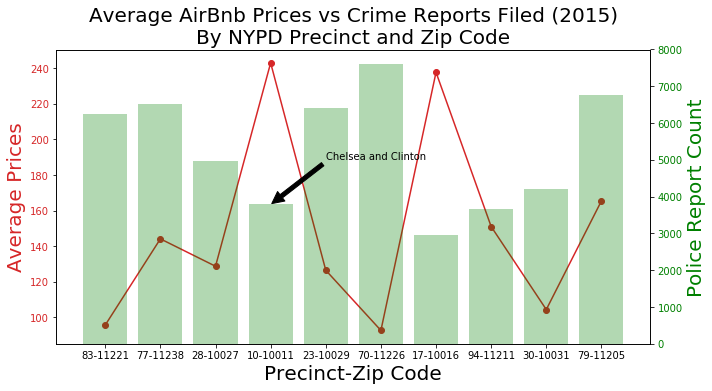

In [110]:
xaxis = crime151617_df["Precinct-Zip"].tolist()

t = xaxis

data2= crime151617_df['Report Count_2015'].tolist()
data1 = reset_df['Mean_2015'].tolist()

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Precinct-Zip Code',fontsize=20)
ax1.set_ylabel('Average Prices', color=color, fontsize=20)
ax1.plot(t, data1, color=color, marker="o")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'green'
ax2.set_ylabel('Police Report Count', color=color,fontsize=20)  # we already handled the x-label with ax1
ax2.bar(t, data2, color=color,alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)
ax2.annotate('Chelsea and Clinton', xy=('10-10011',3786), xytext=(4, 5000),
            arrowprops=dict(facecolor='black', shrink=0.02),
            )

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Average AirBnb Prices vs Crime Reports Filed (2015)\nBy NYPD Precinct and Zip Code", fontsize = 20)

# Save Figure
plt.savefig("../Eric_Project_Crime Rate/2015 Crime vs Price.png",bbox_inches="tight")
plt.show()

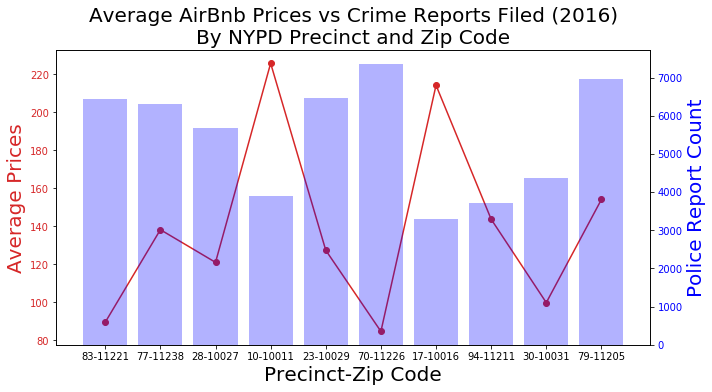

In [57]:
xaxis = crime151617_df["Precinct-Zip"].tolist()

t = xaxis
data2= crime151617_df['Report Count_2016'].tolist()
data1 = reset_df['Mean_2016'].tolist()

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Precinct-Zip Code',fontsize=20)
ax1.set_ylabel('Average Prices', color=color, fontsize=20)
ax1.plot(t, data1, color=color, marker="o")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Police Report Count', color=color,fontsize=20)  # we already handled the x-label with ax1
ax2.bar(t, data2, color=color,alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Average AirBnb Prices vs Crime Reports Filed (2016)\nBy NYPD Precinct and Zip Code", fontsize = 20)

# Save Figure
plt.savefig("../Eric_Project_Crime Rate/2016 Crime vs Price.png",bbox_inches="tight")
plt.show()

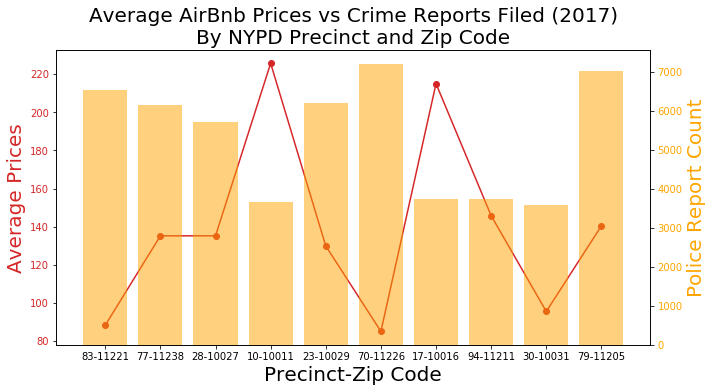

In [59]:
xaxis = crime151617_df["Precinct-Zip"].tolist()

t = xaxis
data2= crime151617_df['Report Count_2017'].tolist()
data1 = reset_df['Mean_2017'].tolist()

fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:red'
ax1.set_xlabel('Precinct-Zip Code',fontsize=20)
ax1.set_ylabel('Average Prices', color=color, fontsize=20)
ax1.plot(t, data1, color=color, marker="o")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'orange'
ax2.set_ylabel('Police Report Count', color=color,fontsize=20)  # we already handled the x-label with ax1
ax2.bar(t, data2, color=color,alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Average AirBnb Prices vs Crime Reports Filed (2017)\nBy NYPD Precinct and Zip Code", fontsize = 20)

# Save Figure
plt.savefig("../Eric_Project_Crime Rate/2017 Crime vs Price.png",bbox_inches="tight")
plt.show()